In [293]:
%matplotlib inline
import pandas as pd
import numpy as np
import locale

import matplotlib
import matplotlib.pyplot as plt

In [294]:
for x in locale.windows_locale.values():
    if 'IN' in x:
        print(x.replace('_','-'))

as-IN
bn-IN
en-IN
en-IN
gu-IN
hi-IN
kn-IN
kok-IN
ml-IN
mr-IN
or-IN
pa-IN
sa-IN
ta-IN
te-IN
ur-IN


In [405]:
#locale.setlocale(locale.LC_ALL, 'en-IN')
locale.setlocale(locale.LC_ALL, '')

def formatCurrency(num):
    if type(num) == str:
        num = float(num)
    return locale.currency(num, symbol=False, grouping=True)

In [425]:
df1 = pd.read_excel('data/AccountStatement_3113325523_03March2011_to_30Nov2017.xls', skiprows=20)
df2 = pd.read_excel('data/AccountStatement_3113325523_01April2018_to_21Oct2018.xls', skiprows=20)

In [465]:
df = pd.concat([df1, df2])
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Post Date'], format='%d/%m/%Y')
df = df.drop(columns=['index', 'Branch Code', 'Cheque Number', 'Post Date', 'Value Date'])
df['Debit'] = pd.to_numeric(df['Debit'].str.strip())
df['Credit'] = pd.to_numeric(df['Credit'].str.strip())
df.head(20)

,Account Description,Debit,Credit,Balance,Date
0,3RD PARTY CHEQUE ADVAN,562500.0,NaN,1470574.000 DR,2011-03-14
1,3RD PARTY CHEQUE ADVAN,900000.0,NaN,908074.000 DR,2011-03-14
2,Service Tax and cess,761.0,NaN,8074.000 DR,2011-03-14
3,Processing Charges,7313.0,NaN,7313.000 DR,2011-03-14
4,LOAN SANCTIONED,1462500.0,NaN,0.000,2011-03-14
5,PART PERIOD INTEREST,5076.0,NaN,1475650.000 DR,2011-03-25
6,PART PERIOD INTEREST,2115.0,NaN,1478188.000 DR,2011-03-31
7,Interest,423.0,NaN,1476073.000 DR,2011-03-31
8,O.S. DEPOSIT TRANSFER,NaN,16200.0,,2011-04-10
9,O.S. DEPOSIT TRANSFER,NaN,512.0,1461988.000 DR,2011-04-10


In [468]:
df.loc[[5,6], ['Account Description']] = 'Interest'
df[(df['Account Description']=='DEPOSIT TRANSFER')].loc[:]['Account Description'] = 'O.S. DEPOSIT TRANSFER'

In [469]:
df

,Account Description,Debit,Credit,Balance,Date
0,3RD PARTY CHEQUE ADVAN,562500.0,NaN,1470574.000 DR,2011-03-14
1,3RD PARTY CHEQUE ADVAN,900000.0,NaN,908074.000 DR,2011-03-14
2,Service Tax and cess,761.0,NaN,8074.000 DR,2011-03-14
3,Processing Charges,7313.0,NaN,7313.000 DR,2011-03-14
4,LOAN SANCTIONED,1462500.0,NaN,0.000,2011-03-14
5,Interest,5076.0,NaN,1475650.000 DR,2011-03-25
6,Interest,2115.0,NaN,1478188.000 DR,2011-03-31
7,Interest,423.0,NaN,1476073.000 DR,2011-03-31
8,O.S. DEPOSIT TRANSFER,NaN,16200.0,,2011-04-10
9,O.S. DEPOSIT TRANSFER,NaN,512.0,1461988.000 DR,2011-04-10


In [410]:
df.columns

Index(['Account Description', 'Debit', 'Credit', 'Balance', 'Date'], dtype='object')

In [434]:
df[df['Account Description']=='Penal Interest'].head()

,Account Description,Debit,Credit,Balance,Date
85,Penal Interest,1.0,NaN,1457621.000 DR,2012-07-31
91,Penal Interest,7.0,NaN,1455553.000 DR,2012-08-31
97,Penal Interest,6.0,NaN,1451942.000 DR,2012-09-30
103,Penal Interest,7.0,NaN,1448595.000 DR,2012-10-31
109,Penal Interest,7.0,NaN,1444806.000 DR,2012-11-30


In [412]:
penalInterest = df[df['Account Description']=='Penal Interest'].drop(columns=['Credit'])['Debit']
np.sum(penalInterest)

565.0

In [413]:
interest = df[(df['Account Description']=='Interest')].drop(columns=['Account Description', 'Credit'])
interest['Debit'] = interest['Debit'].astype(np.float)
formatCurrency(np.sum(interest['Debit']))

'963,759.00'

In [435]:
interest

,Debit,Balance,Date
5,5076.0,1475650.000 DR,2011-03-25
6,2115.0,1478188.000 DR,2011-03-31
7,423.0,1476073.000 DR,2011-03-31
13,12659.0,1474647.000 DR,2011-04-30
18,13513.0,1471960.000 DR,2011-05-31
23,13206.0,1468966.000 DR,2011-06-30
28,13616.0,1466382.000 DR,2011-07-31
33,14519.0,1464701.000 DR,2011-08-31
38,14036.0,1462537.000 DR,2011-09-30
43,14481.0,1460818.000 DR,2011-10-31


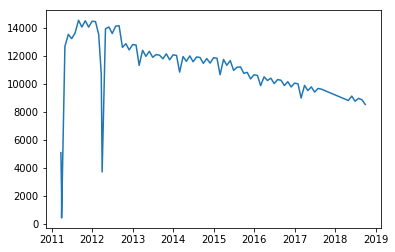

In [415]:
plt.plot(interest['Date'], interest['Debit'])

In [416]:
per = interest['Date'].dt.to_period("M")

In [417]:
interestByMonth = interest.groupby(per).sum()
interestByMonth = interestByMonth.reset_index()
interestByMonth.head()

,Date,Debit
0,2011-03,7614.0
1,2011-04,12659.0
2,2011-05,13513.0
3,2011-06,13206.0
4,2011-07,13616.0


In [437]:
interestByMonth.tail()

,Date,Debit
79,2018-05,9109.0
80,2018-06,8746.0
81,2018-07,8952.0
82,2018-08,8846.0
83,2018-09,8512.0


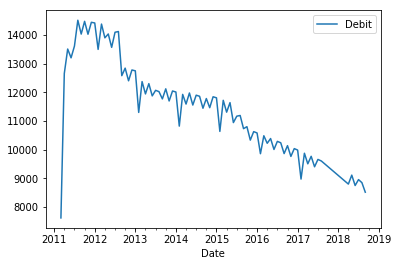

In [447]:
interestByMonth.plot.line('Date', 'Debit')

In [382]:
df.head(20)

,Account Description,Debit,Credit,Balance,Date
0,3RD PARTY CHEQUE ADVAN,562500.0,NaN,1470574.000 DR,2011-03-14
1,3RD PARTY CHEQUE ADVAN,900000.0,NaN,908074.000 DR,2011-03-14
2,Service Tax and cess,761.0,NaN,8074.000 DR,2011-03-14
3,Processing Charges,7313.0,NaN,7313.000 DR,2011-03-14
4,LOAN SANCTIONED,1462500.0,NaN,0.000,2011-03-14
5,Interest,5076.0,NaN,1475650.000 DR,2011-03-25
6,Interest,2115.0,NaN,1478188.000 DR,2011-03-31
7,Interest,423.0,NaN,1476073.000 DR,2011-03-31
8,O.S. DEPOSIT TRANSFER,NaN,16200.0,,2011-10-04
9,O.S. DEPOSIT TRANSFER,NaN,512.0,1461988.000 DR,2011-10-04


In [450]:
principal = (df[(df['Account Description']=='O.S. DEPOSIT TRANSFER') &
                (df['Balance'].str.len() > 1)]).drop(columns=['Account Description', 'Debit'])
principal

,Credit,Balance,Date
9,512.0,1461988.000 DR,2011-04-10
15,3541.0,1458447.000 DR,2011-05-11
20,2687.0,1455760.000 DR,2011-06-10
25,2994.0,1452766.000 DR,2011-07-10
30,2584.0,1450182.000 DR,2011-08-10
35,1681.0,1448501.000 DR,2011-09-10
40,2164.0,1446337.000 DR,2011-10-10
45,1719.0,1444618.000 DR,2011-11-16
50,2170.0,1442448.000 DR,2011-12-11
55,1753.0,1440695.000 DR,2012-01-10


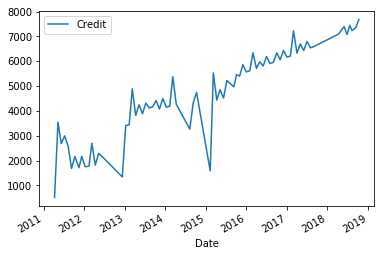

In [451]:
principal.plot('Date', 'Credit')

In [452]:
principal.head()

,Credit,Balance,Date
9,512.0,1461988.000 DR,2011-04-10
15,3541.0,1458447.000 DR,2011-05-11
20,2687.0,1455760.000 DR,2011-06-10
25,2994.0,1452766.000 DR,2011-07-10
30,2584.0,1450182.000 DR,2011-08-10


In [455]:
grp = principal['Date'].dt.to_period("M")
principalByMonth = principal.groupby(grp).sum()
principalByMonth = principalByMonth.reset_index()
principalByMonth.head()

,Date,Credit
0,2011-04,512.0
1,2011-05,3541.0
2,2011-06,2687.0
3,2011-07,2994.0
4,2011-08,2584.0


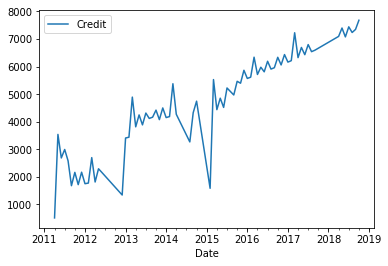

In [457]:

principalByMonth.plot('Date', 'Credit')

In [463]:
principal[(principal['Date'].dt.year==2015)]

,Credit,Balance,Date
275,1586.0,1347389.000 DR,2015-02-10
282,5530.0,1341859.000 DR,2015-03-10
289,4439.0,1337420.000 DR,2015-04-10
296,4855.0,1332565.000 DR,2015-05-10
305,4520.0,1328045.000 DR,2015-06-10
312,5225.0,1316820.000 DR,2015-07-10
327,4971.0,1306847.000 DR,2015-09-11
334,5467.0,1301380.000 DR,2015-10-05
341,5398.0,1295982.000 DR,2015-11-01
348,5867.0,1290115.000 DR,2015-12-01


In [477]:
df[(df['Account Description'] == 'DEPOSIT TRANSFER')]['Account Description'].apply(lambda x:'O.S. DEPOSIT TRANSFER')

302    O.S. DEPOSIT TRANSFER
303    O.S. DEPOSIT TRANSFER
318    O.S. DEPOSIT TRANSFER
319    O.S. DEPOSIT TRANSFER
Name: Account Description, dtype: object

In [478]:
df

,Account Description,Debit,Credit,Balance,Date
0,3RD PARTY CHEQUE ADVAN,562500.0,NaN,1470574.000 DR,2011-03-14
1,3RD PARTY CHEQUE ADVAN,900000.0,NaN,908074.000 DR,2011-03-14
2,Service Tax and cess,761.0,NaN,8074.000 DR,2011-03-14
3,Processing Charges,7313.0,NaN,7313.000 DR,2011-03-14
4,LOAN SANCTIONED,1462500.0,NaN,0.000,2011-03-14
5,Interest,5076.0,NaN,1475650.000 DR,2011-03-25
6,Interest,2115.0,NaN,1478188.000 DR,2011-03-31
7,Interest,423.0,NaN,1476073.000 DR,2011-03-31
8,O.S. DEPOSIT TRANSFER,NaN,16200.0,,2011-04-10
9,O.S. DEPOSIT TRANSFER,NaN,512.0,1461988.000 DR,2011-04-10
